In [2]:
#import analysis
import sys
sys.path.insert(0,'../scripts/')

import test_features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import subplots,scatter
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.externals import joblib
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering
#from yellowbrick.features import RFECV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
def read_data(file_dir,DB_file_dir):
    
    data = []
    label = []
    
    for i in range(len(file_dir)):
        print('loading..{}'.format(file_dir[i]))
        df=pd.read_pickle(file_dir[i])
        psm_ID=list(pd.read_csv(DB_file_dir[i])['Scan'])
        y=np.zeros(df.shape[0])

        for i in range(0,df.shape[0]):
            if df.index[i] in psm_ID:
                y[i]=1

        X = df.drop('RT',axis=1).fillna(0).values
        y =y.astype(int)[X.sum(axis=1)!=0]
        X = X[X.sum(axis=1)!=0]
        X = X/X.max(axis=1).reshape(X.shape[0],1) #normalization
        data.append(X)
        label.append(y)
        del X

    data = np.concatenate((data))
    label = np.concatenate((label))
    return data,label

file_dir = ['../Orbitrap_aplysia/abd.pkl','../Orbitrap_aplysia/buc.pkl']
DB_file_dir = ['../Aplysia_ganglia/Abdominal/DB search psm.csv','../Aplysia_ganglia/Buccal/DB search psm.csv']

data,label = read_data(file_dir,DB_file_dir)

loading..../Orbitrap_aplysia/abd.pkl
loading..../Orbitrap_aplysia/buc.pkl


In [7]:
data = pd.DataFrame(data)

In [31]:
#t-sne
from sklearn.manifold import TSNE
pca = PCA(n_components=50).fit_transform(data)


In [35]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=4000,random_state=19)
tsne_results = tsne.fit_transform(pca)

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=4000,random_state=19)
tsne_results = tsne.fit_transform(data)

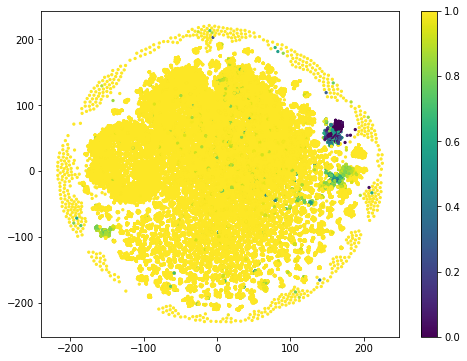

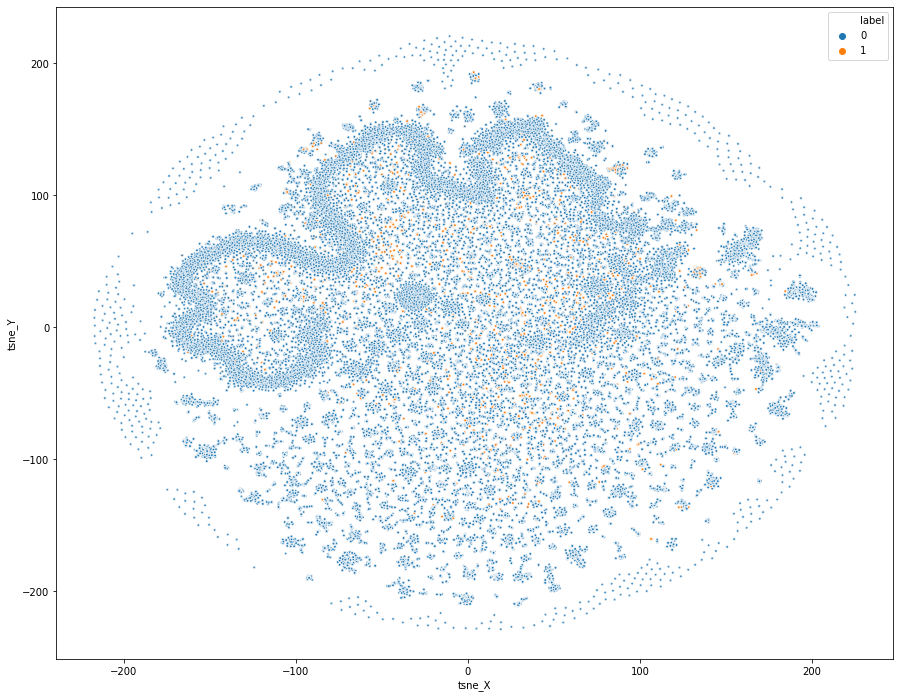

In [21]:
tsne_df = pd.DataFrame()
tsne_df['tsne_X'] = tsne_results[:,0]
tsne_df['tsne_Y'] = tsne_results[:,1]
tsne_df['label'] = label

from sklearn.metrics.pairwise import pairwise_distances

#cos_sim =  pairwise_distances(data.values[0].reshape(1,-1),data.values, metric = 'cosine',n_jobs=8)
subplots(figsize=(8,6))
im=plt.scatter(tsne_df['tsne_X'],tsne_df['tsne_Y'],c=cos_sim[0,:]/cos_sim[0,:].max(),s=5)
plt.colorbar()

fig,axes = subplots(1,1,figsize=(15,12))
sns.scatterplot(x="tsne_X", y="tsne_Y", hue="label",data=tsne_df,s=7,alpha=0.8,edgecolors= None,legend='full')

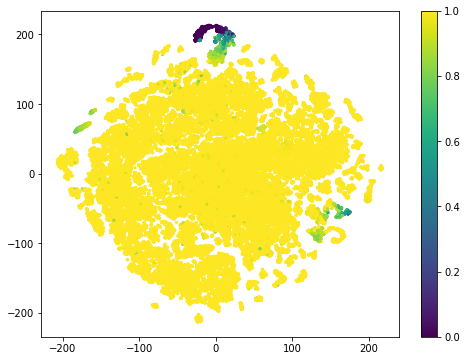

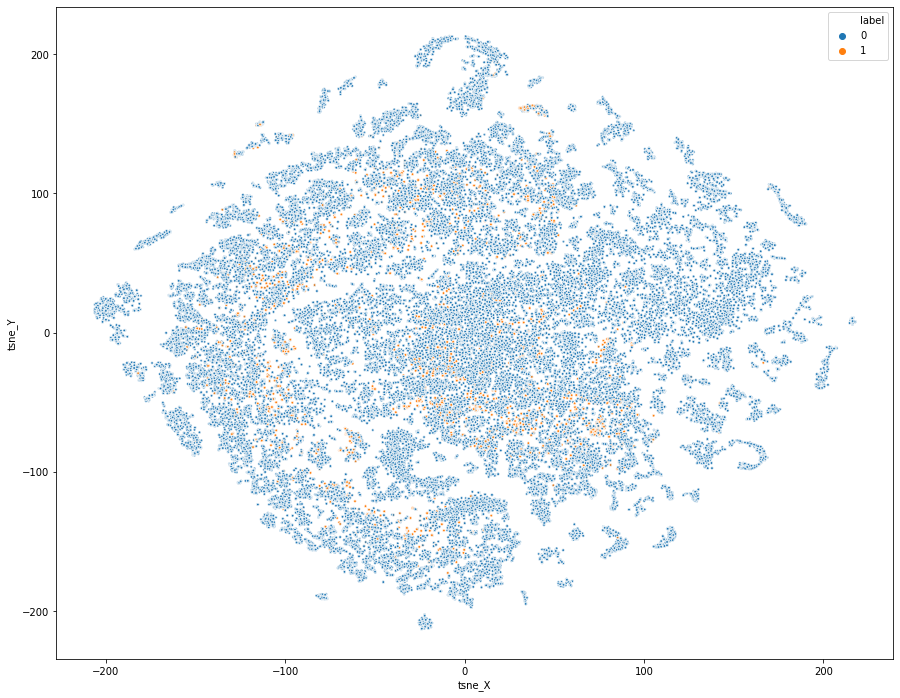

In [36]:
tsne_df = pd.DataFrame()
tsne_df['tsne_X'] = tsne_results[:,0]
tsne_df['tsne_Y'] = tsne_results[:,1]
tsne_df['label'] = label

from sklearn.metrics.pairwise import pairwise_distances

#cos_sim =  pairwise_distances(data.values[0].reshape(1,-1),data.values, metric = 'cosine',n_jobs=8)
subplots(figsize=(8,6))
im=plt.scatter(tsne_df['tsne_X'],tsne_df['tsne_Y'],c=cos_sim[0,:]/cos_sim[0,:].max(),s=5)
plt.colorbar()

fig,axes = subplots(1,1,figsize=(15,12))
sns.scatterplot(x="tsne_X", y="tsne_Y", hue="label",data=tsne_df,s=7,alpha=0.8,edgecolors= None,legend='full')